# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [539]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")
df = df.replace(np.nan,0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1101]:
df = df[(df["SalePrice"] <= df["SalePrice"].quantile(.95)) | (df["SalePrice"] >= df["SalePrice"].quantile(.05))]

In [1116]:
# y = df["price"]
# x = df[["bedrooms","sqft_lot"]]
def lr(x,y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

    m1 = model.fit(X_train, Y_train)

    y_test_prediction = model.predict(X_test)
    MSE = mean_squared_error(Y_test, y_test_prediction)
    RMSE = np.sqrt(mean_squared_error(Y_test, y_test_prediction))
    R2 = r2_score(Y_test, y_test_prediction)
    return MSE,RMSE,R2,m1.coef_,m1.intercept_
    

In [1054]:
df["lnPrice"] = df["SalePrice"].apply(np.log)
y = df["lnPrice"]
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

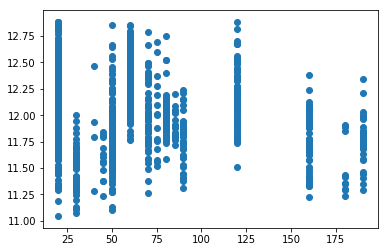

In [1055]:
#plt.scatter(df["RoofMatl"].replace(0,""),df["lnPrice"])

plt.scatter(df["MSSubClass"],df["lnPrice"])


In [1056]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,lnPrice,PriceQuantile
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,2,2008,WD,Normal,208500,12.247694,"(207500.0, 210660.0]"
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,5,2007,WD,Normal,181500,12.109011,"(181000.0, 184017.0]"
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,9,2008,WD,Normal,223500,12.317167,"(220000.0, 224508.0]"
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,2,2006,WD,Abnorml,140000,11.849398,"(139000.0, 140000.0]"
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,12,2008,WD,Normal,250000,12.429216,"(244824.0, 250000.0]"


## neighborhood

In [1057]:
df_neighborhoods= pd.get_dummies(df["Neighborhood"])


lr(x=df_neighborhoods, y = y )

(0.06299417611093922,
 0.25098640622738755,
 0.5353238205429166,
 array([-1.05338721e+13, -1.05338721e+13, -1.05338721e+13, -1.05338721e+13,
        -1.05338721e+13, -1.05338721e+13, -1.05338721e+13, -1.05338721e+13,
        -1.05338721e+13, -1.05338721e+13, -1.05338721e+13, -1.05338721e+13,
        -1.05338721e+13, -1.05338721e+13, -1.05338721e+13, -1.05338721e+13,
        -1.05338721e+13, -1.05338721e+13, -1.05338721e+13, -1.05338721e+13,
        -1.05338721e+13, -1.05338721e+13, -1.05338721e+13, -1.05338721e+13,
        -1.05338721e+13]),
 10533872096008.734)

## MSZoning

In [1058]:
## MSZoning

df_MSZoning= pd.get_dummies(df["Neighborhood"])



lr(x=df_MSZoning, y = y )

(0.0656381849221674,
 0.25619950218953863,
 0.4892903349792177,
 array([-2.25514732e+13, -2.25514732e+13, -2.25514732e+13, -2.25514732e+13,
        -2.25514732e+13, -2.25514732e+13, -2.25514732e+13, -2.25514732e+13,
        -2.25514732e+13, -2.25514732e+13, -2.25514732e+13, -2.25514732e+13,
        -2.25514732e+13, -2.25514732e+13, -2.25514732e+13, -2.25514732e+13,
        -2.25514732e+13, -2.25514732e+13, -2.25514732e+13, -2.25514732e+13,
        -2.25514732e+13, -2.25514732e+13, -2.25514732e+13, -2.25514732e+13,
        -2.25514732e+13]),
 22551473218733.363)

## Sale Condition

In [1059]:
df_SaleCondition= pd.get_dummies(df["SaleCondition"])


lr(x=df_SaleCondition, y = y )

(0.10959651685426113,
 0.3310536464899022,
 0.05516706776180602,
 array([-0.16075269, -0.20926063,  0.03795389, -0.1214144 ,  0.0531983 ,
         0.40027552]),
 11.965132272285237)

## Has Pool

In [1060]:
df_hasPool = df["PoolArea"].apply(lambda x: 1 if x>0 else 0)


lr(x=np.array(df_hasPool).reshape(-1,1), y = y )

(0.12238123853838077,
 0.34983029962880685,
 -0.01150582513658338,
 array([0.22016748]),
 12.023094938848518)

## HouseSTyle

In [1061]:
df_HouseStyle = pd.get_dummies(df["HouseStyle"])


lr(x=df_SaleCondition, y = y )

(0.12622756884543754,
 0.3552851936760629,
 0.07202977124398136,
 array([-0.11920997, -0.33698465, -0.01469948, -0.03098754,  0.06658567,
         0.43529597]),
 11.937689071232645)

## OverallCond

In [1062]:
df_OverallCond = pd.get_dummies(df["OverallCond"])


lr(x=df_OverallCond, y = y )

(0.1106592778498072,
 0.3326548930194883,
 0.09159202272171585,
 array([-0.24872442, -0.30010096, -0.14861109,  0.2842179 ,  0.05638628,
         0.05952703,  0.03430602,  0.26299925]),
 11.842077597934388)

## OverallQual

In [1063]:
lr(x=pd.concat([df["OverallCond"], df["OverallQual"],df["OverallCond"] * df["OverallQual"]], axis=1), y = y )

(0.049898788176004086,
 0.22338036658579483,
 0.6408858968488166,
 array([ 0.03737869,  0.24105451, -0.0055117 ]),
 10.52722529519487)

In [1064]:
lr(x=pd.concat([df["OverallQual"]],axis=1),y=y)

(0.05220155343221148,
 0.22847659274466495,
 0.641011966948416,
 array([0.21132703]),
 10.731537681750446)

In [1065]:
lr(x=pd.concat([df["TotRmsAbvGrd"]],axis=1),y=y)

(0.09286554748077615,
 0.30473849031715067,
 0.2588411215873929,
 array([0.10432359]),
 11.334986899871504)

In [1066]:
#Thermometer
#df_OverallQual.head()
df["OverallQual"]

0        7
1        6
2        7
3        7
4        8
5        5
6        8
7        7
8        7
9        5
10       5
11       9
12       5
13       7
14       6
15       7
16       6
17       4
18       5
19       5
20       8
21       7
22       8
23       5
24       5
25       8
26       5
27       8
28       5
29       4
        ..
1430     5
1431     6
1432     4
1433     6
1434     5
1435     6
1436     4
1437     8
1438     6
1439     7
1440     6
1441     6
1442    10
1443     6
1444     7
1445     6
1446     5
1447     8
1448     4
1449     5
1450     5
1451     8
1452     5
1453     5
1454     7
1455     6
1456     6
1457     7
1458     5
1459     5
Name: OverallQual, Length: 1415, dtype: int64

## Exterior Quality

In [1067]:
df_ExterQual = pd.get_dummies(df["ExterQual"])


lr(x=df_ExterQual, y = y )

(0.07388359840552998,
 0.2718153755870517,
 0.44162602184282596,
 array([ 0.56578279, -0.54094021,  0.20823183, -0.23307441]),
 12.087870127477084)

In [1068]:
lr(x=pd.concat([df_ExterQual,df_OverallQual],axis=1), y = y )

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1415]

## Year Sold

In [1069]:
df_YearSold = pd.get_dummies(df["YrSold"])


lr(x=df_YearSold, y = y )

(0.12402086891175154,
 0.3521659678500345,
 0.0008762178027912348,
 array([2.08596171e+13, 2.08596171e+13, 2.08596171e+13, 2.08596171e+13,
        2.08596171e+13]),
 -20859617062773.047)

## BLDGType

In [1070]:
df_BldgType = pd.get_dummies(df["BldgType"])


lr(x=df_BldgType, y = y )

(0.11741047131300962,
 0.34265211412307034,
 0.022497210075791974,
 array([ 0.16584288, -0.15776796, -0.0943452 , -0.09640907,  0.18267936]),
 11.880172313701804)

In [1071]:
df["MasVnrType"]= df["MasVnrType"].replace(0,"")
df_MasVnrType = pd.get_dummies(df["MasVnrType"])


lr(x=df_MasVnrType, y = y )

(0.1063598527679828,
 0.32612858318151566,
 0.22183691531376415,
 array([ 0.11934485, -0.19347011,  0.02715708, -0.18636203,  0.23333021]),
 12.10217552913083)

## ScreenPorch

In [1072]:
df_hasScreenPorch = df["ScreenPorch"].apply(lambda x : 1 if x >0 else 0)
df_SP = pd.concat([df["ScreenPorch"],df_hasScreenPorch],axis=1 )


lr(x=df_SP, y = y )

(0.11212031037409108,
 0.3348437103696157,
 0.0038973040880316834,
 array([ 0.0012564 , -0.13654367]),
 12.016704948513738)

In [1073]:
df_Condition1 = pd.get_dummies(df["Condition1"])


lr(x=df_Condition1, y = y )


(0.12345418838096195,
 0.35136048209917115,
 0.028616544787608333,
 array([-2.29151584e+13, -2.29151584e+13, -2.29151584e+13, -2.29151584e+13,
        -2.29151584e+13, -2.29151584e+13, -2.29151584e+13, -2.29151584e+13,
        -2.29151584e+13]),
 22915158438394.293)

LotShape

In [1074]:
df_LotShape =  pd.get_dummies(df["LotShape"])



lr(x=df_LotShape, y = y )

(0.114254219018637,
 0.338015116553442,
 0.028009150127461413,
 array([ 0.05290469,  0.05501855,  0.06948628, -0.17740951]),
 12.11079117598164)

## LotConfig

In [1075]:
df_LandShape =  df["df_LandShape"y(lambda x : 1 if x >0 else 0)



lr(x=df_LotConfig, y = y )

SyntaxError: invalid syntax (<ipython-input-1075-d6ddc6afc487>, line 1)

# Basics

In [1076]:
lr(x=np.array(df["GarageCars"]).reshape(-1,1), y = y )

(0.07400202895359696,
 0.2720331394400266,
 0.3700395827671211,
 array([0.3245518]),
 11.440127636381506)

In [1077]:
lr(x=np.array(df["Fireplaces"]).reshape(-1,1), y = y )

(0.09561301845224263,
 0.30921354829994535,
 0.1885600384823123,
 array([0.26676453]),
 11.852105693525058)

In [1078]:
lr(x=np.array(df["MSSubClass"]).reshape(-1,1), y = y )

(0.12121304310539584,
 0.3481566358772957,
 0.00022480855058837346,
 array([-0.00071329]),
 12.061223611896756)

In [1079]:
lr(x=df[["FullBath","HalfBath"]],y=y)

(0.0822596776109784,
 0.2868094796393215,
 0.34497841227449444,
 array([0.36822302, 0.16025269]),
 11.380215725525426)

In [1080]:

baths = df["BsmtFullBath"]+df["BsmtHalfBath"]+df["FullBath"]+df["HalfBath"]


lr(x=np.array(baths).reshape(-1,1), y = y )

(0.06849986881697222,
 0.2617247959536357,
 0.45346992332160074,
 array([0.24448223]),
 11.424458809318466)

In [1081]:
df_roof= pd.get_dummies(df["RoofStyle"])
lr(x=df_roof, y = y )

(0.11739950353525491,
 0.3426361095028586,
 -0.002112728301397304,
 array([-0.07388807, -0.13527881, -0.18576261,  0.01234546,  0.19555576,
         0.18702826]),
 12.124579867714575)

## Central Air

In [1082]:
df['CentralAir']=df['CentralAir'].replace("N",0)
df['CentralAir']=df['CentralAir'].replace("Y",1)
lr(np.array(df["CentralAir"]).reshape(-1,1),y)

(0.10530606891206365,
 0.32450896584233796,
 0.08835975527379025,
 array([0.43636163]),
 11.601650498834427)

In [1083]:
lr(np.array(df["BedroomAbvGr"]).reshape(-1,1),y)

(0.10660540941530859,
 0.3265048382724345,
 0.014514343666956364,
 array([0.08272112]),
 11.781895697987444)

# SQFT Calcs

In [1084]:
sq1f= df[["1stFlrSF"]]**0.5
f1 = pd.concat([sq1f,df["1stFlrSF"]],axis=1)
lr(f1, df["lnPrice"])

(0.07956921865616108,
 0.2820801635283153,
 0.3298051633452792,
 array([ 0.07031655, -0.00045174]),
 10.18635542557397)

In [1085]:
sq2f= df[["2ndFlrSF"]]**0.5
f2 = pd.concat([sq2f,df["2ndFlrSF"]],axis=1)
lr(f2 , df["lnPrice"])

(0.09501516728009199,
 0.3082453037437748,
 0.18355728107032576,
 array([-0.04242791,  0.00163169]),
 11.962028194222048)

In [1086]:
f12 = df["1stFlrSF"]+df["2ndFlrSF"]
euc_f12 = np.sqrt(df["1stFlrSF"]**2+df["2ndFlrSF"]**2)
lr(np.array(euc_f12).reshape(-1,1) , df["lnPrice"])

(0.05892122036870152,
 0.24273693655622647,
 0.5363614693117617,
 array([0.00068997]),
 11.132335522696005)

In [1087]:
wd = df["WoodDeckSF"]
wd2 = wd**2
wd= pd.concat([wd,wd2],axis=1)
lr(wd, df["lnPrice"])

(0.12363388613050723,
 0.35161610618756817,
 0.09330993628803941,
 array([ 1.45749417e-03, -1.44641005e-06]),
 11.909468096082064)

In [1088]:
sqfteq = pd.concat([df["1stFlrSF"],df["1stFlrSF"]**2,df["2ndFlrSF"],df["2ndFlrSF"]**2,df["1stFlrSF"]*df["2ndFlrSF"]],axis=1)

In [1089]:
lr(sqfteq,y)

(0.047548203758758095,
 0.21805550614180347,
 0.5858879262747017,
 array([ 1.32880105e-03, -1.97671133e-07,  7.50436944e-04,  3.21872397e-07,
        -5.78793455e-07]),
 10.624465011033653)

## Multi

In [1090]:
#df_neighborhoods, df_hasPool,df_SaleCondition,df_MSZoning

In [1117]:
df_multi= pd.concat([df_neighborhoods,sqfteq,df_SP,df["GarageCars"],df["OverallQual"],baths, df["CentralAir"],\
                     df["TotRmsAbvGrd"],df["Fireplaces"],df["BedroomAbvGr"], df_hasPool ],axis=1)


lr(df_multi, df["lnPrice"])

(0.016790627135993812,
 0.12957865231585722,
 0.8767363406209888,
 array([-8.64613269e+05, -8.64613362e+05, -8.64613436e+05, -8.64613248e+05,
        -8.64613121e+05, -8.64613167e+05, -8.64613111e+05, -8.64613293e+05,
        -8.64613190e+05, -8.64613279e+05, -8.64613416e+05, -8.64613244e+05,
        -8.64613261e+05, -8.64613344e+05, -8.64613269e+05, -8.64613118e+05,
        -8.64613097e+05, -8.64613344e+05, -8.64613267e+05, -8.64613246e+05,
        -8.64613247e+05, -8.64613140e+05, -8.64613099e+05, -8.64613167e+05,
        -8.64613125e+05,  6.84357093e-04, -1.25454904e-07,  2.58507394e-04,
         1.04488608e-07, -1.60596619e-07,  2.92860746e-04, -2.75974221e-02,
         5.33525101e-02,  8.39559940e-02,  6.14247536e-02,  1.32806169e-01,
        -6.71728922e-03,  3.18172878e-02, -8.72495942e-03,  6.60165543e-02]),
 864623.7458273901)

In [1118]:
df_multi1= pd.concat([df_MSZoning, sqfteq,df_SP,df["GarageCars"],df["OverallQual"],baths, df["CentralAir"],\
                     df["TotRmsAbvGrd"],df["Fireplaces"],df["BedroomAbvGr"], df_hasPool ],axis=1)


lr(df_multi1, df["lnPrice"])

(0.016170309709075122,
 0.1271625326465116,
 0.8719307391520852,
 array([ 9.50862697e+05,  9.50862604e+05,  9.50862551e+05,  9.50862743e+05,
         9.50862875e+05,  9.50862816e+05,  9.50862873e+05,  9.50862693e+05,
         9.50862799e+05,  9.50862685e+05,  9.50862581e+05,  9.50862747e+05,
         9.50862730e+05,  9.50862637e+05,  9.50862729e+05,  9.50862864e+05,
         9.50862880e+05,  9.50862650e+05,  9.50862712e+05,  9.50862743e+05,
         9.50862739e+05,  9.50862840e+05,  9.50862871e+05,  9.50862831e+05,
         9.50862866e+05,  7.37728839e-04, -1.43704972e-07,  2.67022106e-04,
         1.21163646e-07, -1.73601357e-07,  3.91511448e-04, -4.62533952e-02,
         5.17975116e-02,  8.43094007e-02,  6.49876614e-02,  1.31817065e-01,
        -5.84132435e-03,  2.93417278e-02, -1.84208160e-02, -9.70938302e-03]),
 -950852.2638049674)

In [1121]:
df_Samir = df[["OverallQual", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF",  "GrLivArea", "TotRmsAbvGrd", "GarageArea"]]
lr(df_Samir,y)

(0.030537292564821773,
 0.17474922765157438,
 0.780336720285548,
 array([1.36095154e-01, 7.53947189e-05, 5.73223258e-05, 2.65172203e-05,
        1.49543399e-04, 1.07313998e-02, 3.23642065e-04]),
 10.618250323701702)

In [1120]:
df_multi.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,ScreenPorch,ScreenPorch,GarageCars,OverallQual,0,CentralAir,TotRmsAbvGrd,Fireplaces,BedroomAbvGr,PoolArea
0,0,0,0,0,0,1,0,0,0,0,...,0,0,2,7,4,1,8,0,3,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,6,3,1,6,1,3,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,7,4,1,6,1,3,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,3,7,2,1,7,1,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,3,8,4,1,9,1,4,0


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data